<a href="https://colab.research.google.com/github/Surajkr1166/Task-5/blob/main/STOCK_MARKET_ANALYSIS_AND_PREDICTION_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error


In [ ]:
#upload the dataset
from google.colab import files
uploaded = files.upload()

Saving nvidia_stock_prices.csv to nvidia_stock_prices.csv


In [ ]:
#load the dataset
stock_data = pd.read_csv('nvidia_stock_prices.csv')

In [ ]:
# Inspect the data
print(stock_data.info())
print(stock_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5033 non-null   object 
 1   Open    5033 non-null   float64
 2   High    5033 non-null   float64
 3   Low     5033 non-null   float64
 4   Close   5033 non-null   float64
 5   Volume  5033 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 236.0+ KB
None
         Date      Open      High       Low     Close      Volume
0  2004-01-02  0.196417  0.199083  0.192333  0.192333   436416000
1  2004-01-05  0.195250  0.199917  0.193500  0.198583   575292000
2  2004-01-06  0.198000  0.209417  0.197083  0.206667  1093344000
3  2004-01-07  0.204333  0.209500  0.202917  0.208500   673032000
4  2004-01-08  0.211083  0.212083  0.207250  0.209250   433752000


In [ ]:
# Ensure the Date column is in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)


In [ ]:
# Select the column for analysis (e.g., 'Close')
stock_data = stock_data[['Close']]

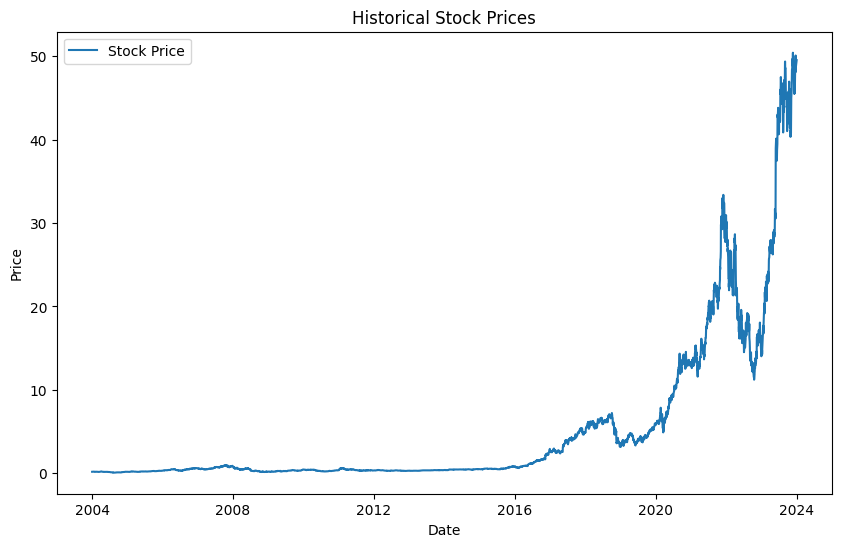

In [ ]:
# Plot the historical data
plt.figure(figsize=(10, 6))
plt.plot(stock_data, label='Stock Price')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

ADF Statistic: 2.0913618670484864
p-value: 0.9987805185477441


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

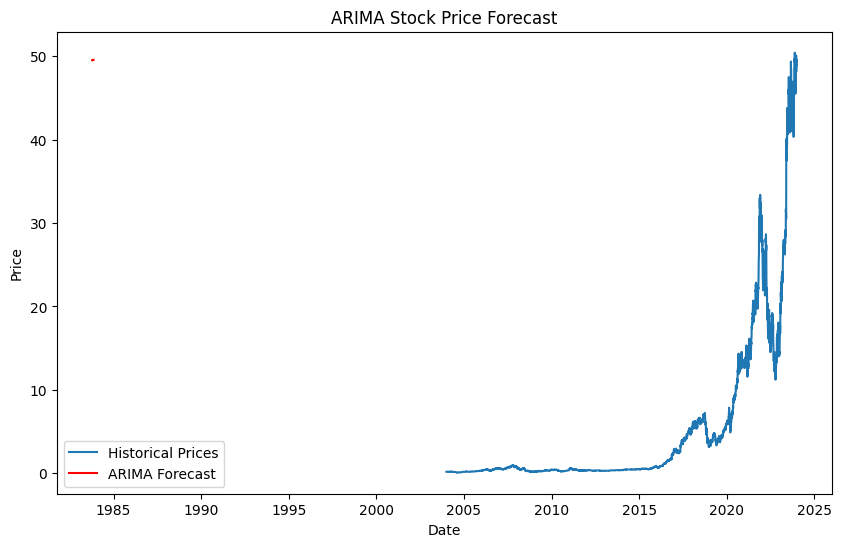

In [ ]:
# 1. ARIMA Model for Baseline Prediction
# Differencing to make the series stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(stock_data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Fit the ARIMA model
arima_model = ARIMA(stock_data, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast with ARIMA
forecast = arima_result.forecast(steps=30)
plt.figure(figsize=(10, 6))
plt.plot(stock_data, label='Historical Prices')
plt.plot(forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# 2. LSTM Model for Advanced Prediction
# Data scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)

# Prepare the data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X, y = create_dataset(scaled_data, look_back)

# Reshape data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Train the LSTM model
model.fit(X_train, y_train, batch_size=1, epochs=5)


Epoch 1/5
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 128s 31ms/step - loss: 6.3724e-05
Epoch 2/5
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 127s 28ms/step - loss: 2.1603e-05
Epoch 3/5
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 136s 26ms/step - loss: 1.3254e-05
Epoch 4/5
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 141s 26ms/step - loss: 1.0133e-05
Epoch 5/5
3977/3977 ━━━━━━━━━━━━━━━━━━━━ 142s 26ms/step - loss: 7.6394e-06


In [ ]:
# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


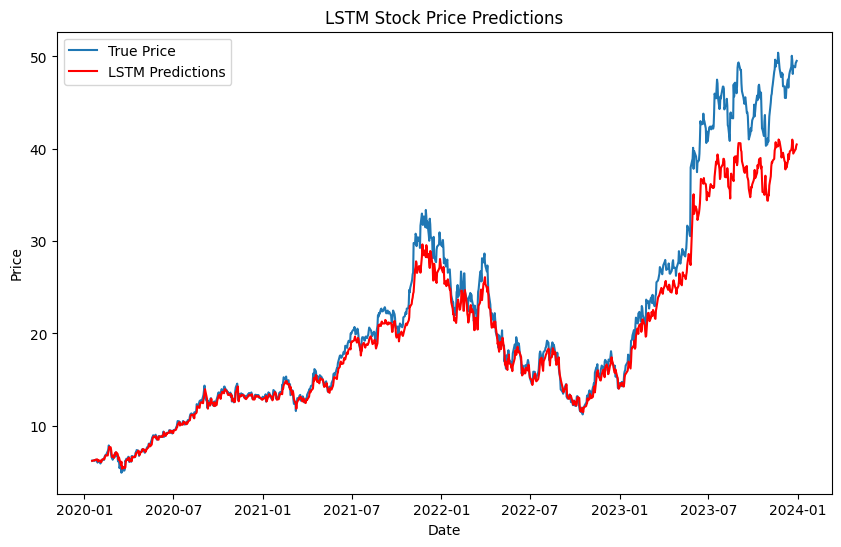

In [ ]:
# Plot the LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Price')
plt.plot(stock_data.index[-len(y_test):], predictions, label='LSTM Predictions', color='red')
plt.title('LSTM Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()